In [83]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image,ImageDraw

In [84]:
file= open('coco_format_fish_data.json')
dataset= json.load(file)

In [85]:
print(dataset.keys())
# categories= dataset['categories']
# del dataset['categories']
# categories

dict_keys(['images', 'annotations', 'info', 'licenses', 'categories'])


In [86]:
images= pd.DataFrame(dataset['images'])
annotations= pd.DataFrame(dataset['annotations'])
del annotations['segmentation']
print(images.head())
print(annotations.head())

   license         file_name  width  height  id
0        0  21_07_21-B16.jpg   4032    3024   0
1        0  21_04_21-B41.jpg   4032    3024   1
2        0   26_05_21-B9.jpg   4032    3024   2
3        0  20_04_21-B14.jpg   4032    3024   3
4        0   14_05_21-B6.jpg   3648    2736   4
   iscrowd  image_id                                     bbox           area  \
0        0       871  [606.0, 446.2339, 1226.6115, 2124.7661]  956750.024299   
1        0       871      [1327.0, 678.8187, 868.211, 1954.0]  851168.961635   
2        0       871     [1949.0, 606.8033, 652.0, 2046.1967]  853642.308700   
3        0       871  [2437.3292, 542.9875, 716.1556, 1915.5]  769454.532116   
4        0       871  [3081.0, 441.6543, 626.6804, 1871.4244]  706304.906956   

   id  category_id  
0   1            0  
1   2            0  
2   3            0  
3   4            0  
4   5            0  


In [87]:
DATASET_PATH= './DATASET/'


In [88]:
import os
def isImageExist(image_path:str):
        path= DATASET_PATH+image_path
        if os.path.exists(path):
            return True
        else:
            return False
def read_image(image_path:str):
    if isImageExist(image_path):
        return PIL.Image.open(DATASET_PATH+image_path)
    return None
isImageExist('21_04_21-B8.jpg')

True

In [89]:
def isImageIDExists(image_ID:str, load_image:bool):
    path= images.loc[images['id'] == image_ID]
    if len(path) == 0:
        return False,None
    path= path.iloc[0]['file_name']
    if isImageExist(path):
        if load_image:
            return True,read_image(path) 
        else:
            return True,None
    return False,None

In [90]:
def displayPillowImg(img):
        plt.imshow(img)
        plt.show()

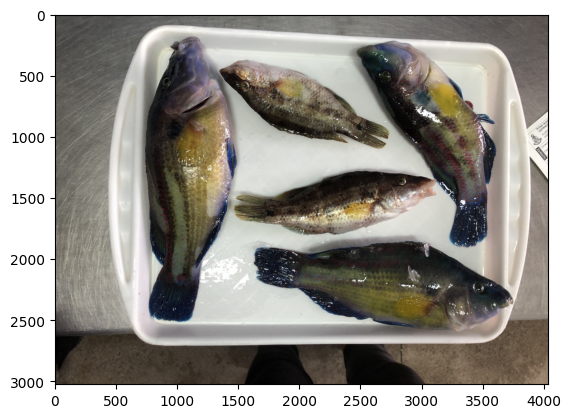

In [91]:
def displayImage(image_ID:str):
    _,image= isImageIDExists(image_ID,True)
    if image is not None:
       displayPillowImg(image)
displayImage(annotations.iloc[500]['image_id'])
# print(annotations.iloc[500])

In [92]:
##Filter images dataset
for i in range(len(images)):
    if not isImageExist(images.loc[i,'file_name']):
        images.loc[i,'file_name']= None
print(len(images))
images=images.dropna()
print(len(images))

1320
847


In [93]:
###Filter annotations
for i in range(len(annotations)):
    # print(annotations.loc[i])
    if not isImageIDExists(annotations.loc[i,'image_id'], False)[0]:
        annotations.loc[i,'image_id']= None
print(len(annotations))
annotations= annotations.dropna()
print(len(annotations))

7339
5389


      iscrowd  image_id                                         bbox  \
2611        0     500.0         [697.0, 332.883, 1222.021, 452.4879]   
2612        0     500.0       [692.0, 558.9398, 1369.3491, 794.3529]   
2613        0     500.0   [688.1656, 1058.4477, 499.6213, 1164.7343]   
2614        0     500.0    [879.3897, 870.5606, 526.6103, 1158.9629]   
2615        0     500.0      [1189.0, 995.2942, 815.7369, 1011.2577]   
2616        0     500.0    [751.373, 2165.7444, 1228.5856, 717.2556]   
2617        0     500.0  [1415.9708, 2134.3618, 1203.6719, 607.0354]   
2618        0     500.0  [1289.8107, 1656.3263, 1146.1784, 787.4542]   
2619        0     500.0    [1849.2454, 417.5856, 702.286, 1196.4144]   
2620        0     500.0  [1973.8061, 1260.0498, 283.1939, 1293.6005]   
2621        0     500.0  [2209.3479, 1434.0015, 461.6521, 1276.7681]   
2622        0     500.0     [2299.918, 1023.121, 629.0599, 1267.879]   
2623        0     500.0       [2615.2874, 884.0, 449.891, 1237.2

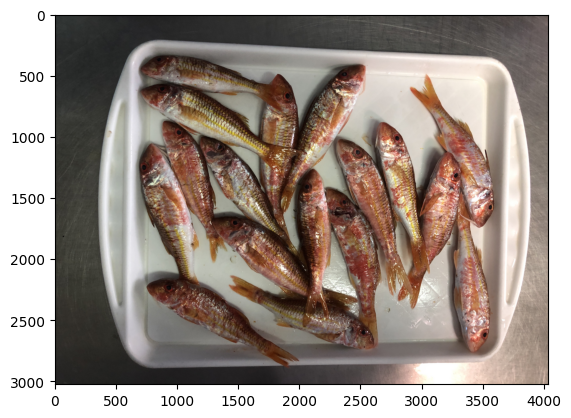

In [94]:
def get_all_annotations_for_image(image_id:str):
    return annotations.loc[annotations['image_id']==image_id]
print(get_all_annotations_for_image(500))
displayImage(500)

In [95]:
def drawBoundingBox(draw:ImageDraw.Draw ,box):
    draw.rectangle((box[0], box[1], box[0]+box[2], box[1]+box[3]), outline=(0,0,0), width=5)

In [96]:
def drawBBoxes(imageID):
    image= isImageIDExists(imageID,True)[1]
    imageDraw= ImageDraw.Draw(image)
    image_annotations= get_all_annotations_for_image(imageID)
    for ann in range(len(image_annotations)):
        bbox=image_annotations.iloc[ann]['bbox']
        drawBoundingBox(imageDraw,bbox)
    
    displayPillowImg(image)

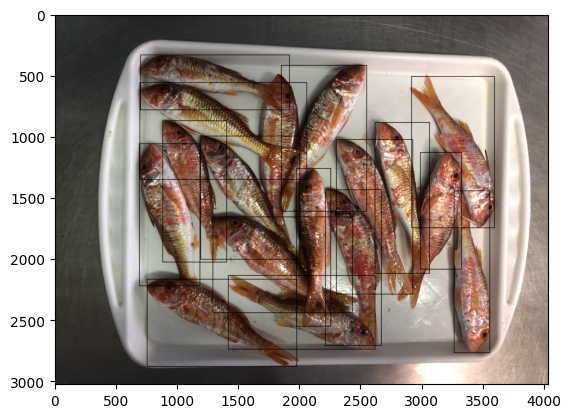

In [97]:
drawBBoxes(imageID=500)

In [98]:
images.head()

,license,file_name,width,height,id
0,0,21_07_21-B16.jpg,4032,3024,0
1,0,21_04_21-B41.jpg,4032,3024,1
2,0,26_05_21-B9.jpg,4032,3024,2
3,0,20_04_21-B14.jpg,4032,3024,3
5,0,4_05_21-B1.jpg,4032,3024,5


In [99]:
annotations.head()

,iscrowd,image_id,bbox,area,id,category_id
5,0,1162.0,"[744.0, 1870.6919, 1212.0, 856.3644]",304822.702286,6,2
6,0,1162.0,"[1616.7584, 1393.3031, 815.2416, 971.3503]",225844.462833,7,2
7,0,1162.0,"[1146.0, 1009.0, 722.8062, 913.0]",262616.350692,8,2
8,0,1162.0,"[1902.4298, 1910.0, 268.5702, 739.0]",100552.147524,9,2
9,0,1162.0,"[2152.2974, 1663.0, 345.6537, 967.7276]",213388.503917,10,2


In [100]:
# make new variable data with (id, file_name from images), (image_id, bbox) from annotations
merged_data= pd.merge(images, annotations, left_on='id', right_on='image_id')
merged_data.head()

,license,file_name,width,height,id_x,iscrowd,image_id,bbox,area,id_y,category_id
0,0,21_04_21-B41.jpg,4032,3024,1,0,1.0,"[714.8573, 332.0, 1211.1427, 630.0]",235468.231415,556,3
1,0,21_04_21-B41.jpg,4032,3024,1,0,1.0,"[1271.0, 316.53, 1161.9159, 685.4159]",224904.545647,557,3
2,0,21_04_21-B41.jpg,4032,3024,1,0,1.0,"[1986.5905, 334.2359, 1140.4095, 342.7641]",214098.201927,558,3
3,0,21_04_21-B41.jpg,4032,3024,1,0,1.0,"[2380.3208, 533.9781, 1323.4675, 273.0219]",217046.859605,559,3
4,0,21_04_21-B41.jpg,4032,3024,1,0,1.0,"[2833.0, 765.5651, 629.6211, 983.4349]",256271.443564,560,3


In [101]:
# merge id_x and image_id columns in the same column
merged_data= merged_data.drop(columns=['image_id', 'id_y'])
merged_data= merged_data.rename(columns={'id_x':'id'})
merged_data.head()

,license,file_name,width,height,id,iscrowd,bbox,area,category_id
0,0,21_04_21-B41.jpg,4032,3024,1,0,"[714.8573, 332.0, 1211.1427, 630.0]",235468.231415,3
1,0,21_04_21-B41.jpg,4032,3024,1,0,"[1271.0, 316.53, 1161.9159, 685.4159]",224904.545647,3
2,0,21_04_21-B41.jpg,4032,3024,1,0,"[1986.5905, 334.2359, 1140.4095, 342.7641]",214098.201927,3
3,0,21_04_21-B41.jpg,4032,3024,1,0,"[2380.3208, 533.9781, 1323.4675, 273.0219]",217046.859605,3
4,0,21_04_21-B41.jpg,4032,3024,1,0,"[2833.0, 765.5651, 629.6211, 983.4349]",256271.443564,3


In [102]:
# check if data has more than on record for each image id
merged_data['id'].value_counts().max()

29

In [103]:
merged_data.drop(columns=['license', 'category_id', 'iscrowd'], inplace=True)
merged_data.head()

,file_name,width,height,id,bbox,area
0,21_04_21-B41.jpg,4032,3024,1,"[714.8573, 332.0, 1211.1427, 630.0]",235468.231415
1,21_04_21-B41.jpg,4032,3024,1,"[1271.0, 316.53, 1161.9159, 685.4159]",224904.545647
2,21_04_21-B41.jpg,4032,3024,1,"[1986.5905, 334.2359, 1140.4095, 342.7641]",214098.201927
3,21_04_21-B41.jpg,4032,3024,1,"[2380.3208, 533.9781, 1323.4675, 273.0219]",217046.859605
4,21_04_21-B41.jpg,4032,3024,1,"[2833.0, 765.5651, 629.6211, 983.4349]",256271.443564


In [104]:
# make id column first
merged_data= merged_data[['id', 'file_name', 'bbox', 'height','width', 'area']]
merged_data.head()

,id,file_name,bbox,height,width,area
0,1,21_04_21-B41.jpg,"[714.8573, 332.0, 1211.1427, 630.0]",3024,4032,235468.231415
1,1,21_04_21-B41.jpg,"[1271.0, 316.53, 1161.9159, 685.4159]",3024,4032,224904.545647
2,1,21_04_21-B41.jpg,"[1986.5905, 334.2359, 1140.4095, 342.7641]",3024,4032,214098.201927
3,1,21_04_21-B41.jpg,"[2380.3208, 533.9781, 1323.4675, 273.0219]",3024,4032,217046.859605
4,1,21_04_21-B41.jpg,"[2833.0, 765.5651, 629.6211, 983.4349]",3024,4032,256271.443564


In [105]:
path = 'DATASET/'
merged_data['file_name'] = path + merged_data['file_name']
merged_data.head()

,id,file_name,bbox,height,width,area
0,1,DATASET/21_04_21-B41.jpg,"[714.8573, 332.0, 1211.1427, 630.0]",3024,4032,235468.231415
1,1,DATASET/21_04_21-B41.jpg,"[1271.0, 316.53, 1161.9159, 685.4159]",3024,4032,224904.545647
2,1,DATASET/21_04_21-B41.jpg,"[1986.5905, 334.2359, 1140.4095, 342.7641]",3024,4032,214098.201927
3,1,DATASET/21_04_21-B41.jpg,"[2380.3208, 533.9781, 1323.4675, 273.0219]",3024,4032,217046.859605
4,1,DATASET/21_04_21-B41.jpg,"[2833.0, 765.5651, 629.6211, 983.4349]",3024,4032,256271.443564


In [106]:
def read_image(image_path: str) -> Image.Image:
    return Image.open(image_path)

def show_image(image: Image.Image):
    plt.imshow(image)
    plt.show()

def show_image_with_bbox(image: Image.Image, bbox: list):
    draw = ImageDraw.Draw(image)
    for box in bbox:
        draw.rectangle((box[0], box[1], box[0]+box[2], box[1]+box[3]), outline=(0,0,0), width=5)
    show_image(image)


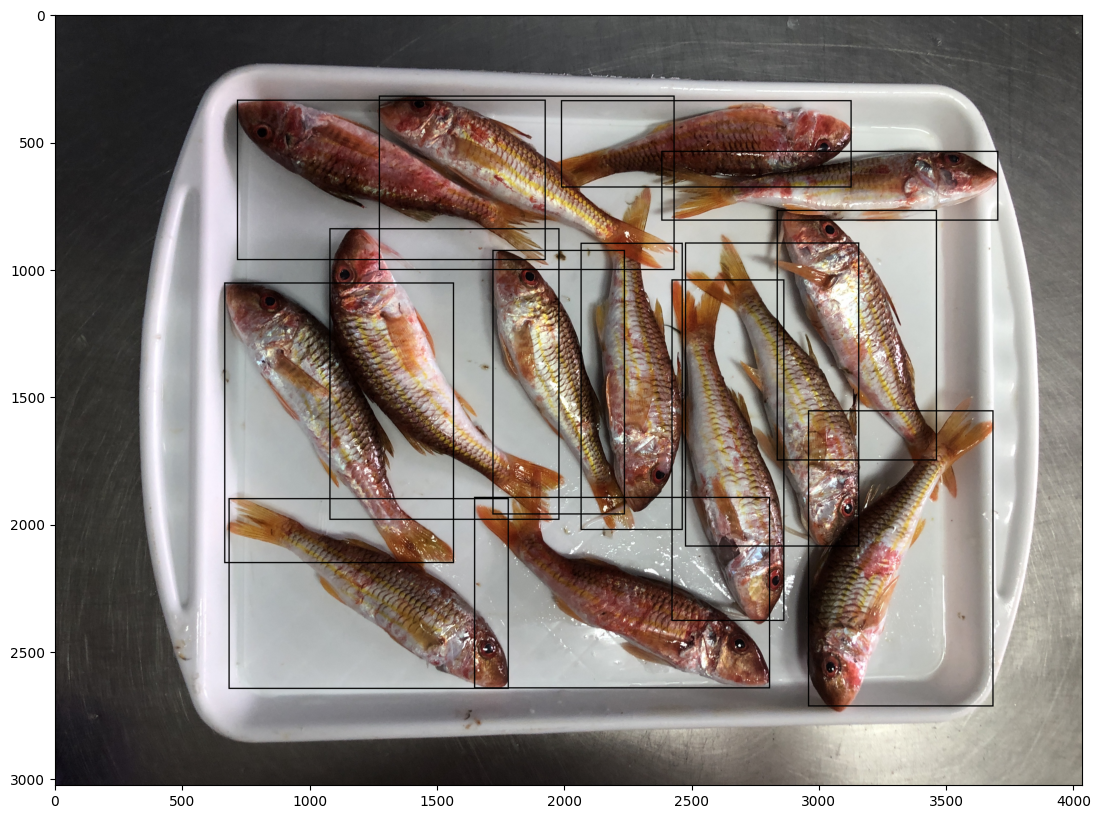

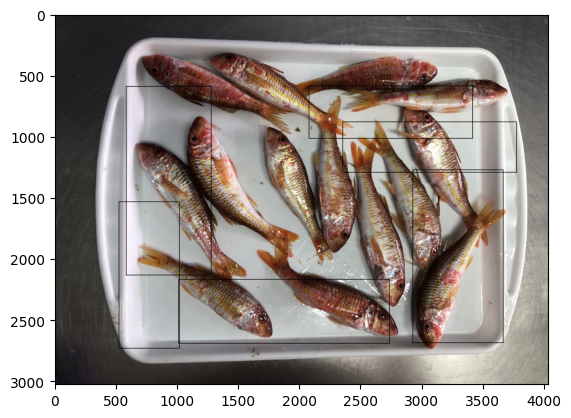

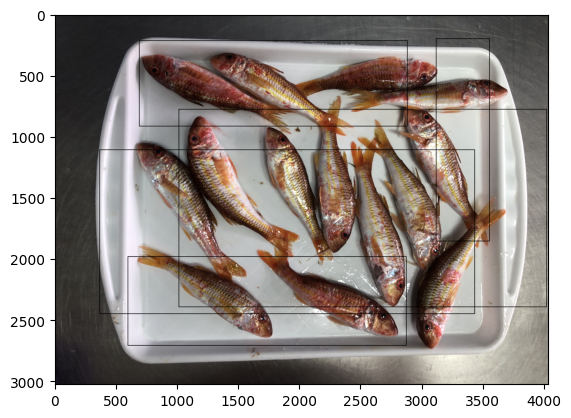

In [107]:
figure = plt.figure(figsize=(20, 10))
for i in range(1, 5):
    image = read_image(merged_data.loc[i, 'file_name'])
    bbox = merged_data.loc[merged_data['id']==i, 'bbox']
    if len(bbox) > 0:
        show_image_with_bbox(image, bbox)